# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [113]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns 
%matplotlib inline

### Step 2: Read in your data set 

In [71]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [16]:
df_raw.tail()

,admit,gre,gpa,prestige
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


#### Question 2. Create a summary table

In [72]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because the scale of the GRE is from 220 to 800, while gpa is only 2.26 to 4.  

#### Question 4. Drop data points with missing data


In [27]:
df_raw.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [97]:
columns = df_raw.columns.values
type(columns)
print columns

['admit' 'gre' 'gpa' 'prestige']
['admit', 'gre', 'gpa', 'prestige']


In [121]:
#df_raw.dropna(subset=['admit','gre','gpa','prestige'])
df= df_raw.dropna()
#rows = df_raw.index.values
#for col in columns:
#    for row in rows:
#        if df_raw[[col]].iloc[row] == NA:
#            print 'yes'
           # print df_raw[[col]].iloc[row]
#for row in df_raw.index.values:
#for values in df_raw['gpa'].isnull():
#    if values == True:
#        print values
#for values in df_raw['admit'].isnull():
#    if values == True:
#        print values
#for values in df_raw['gre'].isnull():
#    if values == True:
#        print values
#for values in df_raw['prestige'].isnull():
#    if values == True:
#        print values
        


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [120]:
df.isnull().values.any()

False

Answer: 

#### Question 6. Create box plots for GRE and GPA

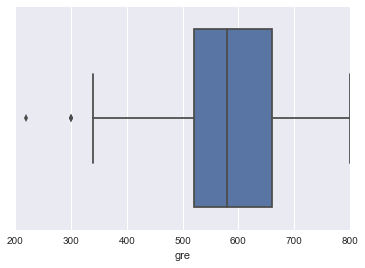

In [115]:
sns.boxplot(df_raw['gre'])

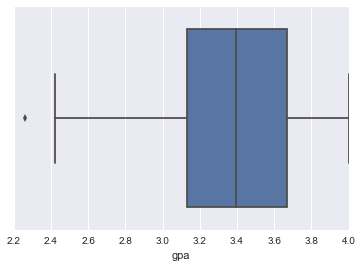

In [116]:
sns.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: the quartile ranges, the average, and outliers of each columns worth of data 

#### Question 8. Describe each distribution 

-0.211765490335
-0.574622543216


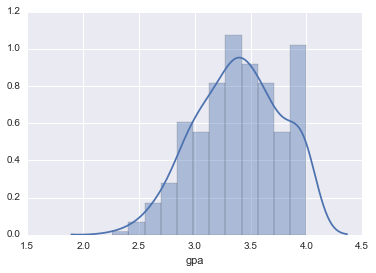

In [128]:
sns.distplot(df_raw['gpa'].dropna())
print df_raw['gpa'].skew()
print df_raw['gpa'].kurtosis()


-0.150126665946
-0.330065338167


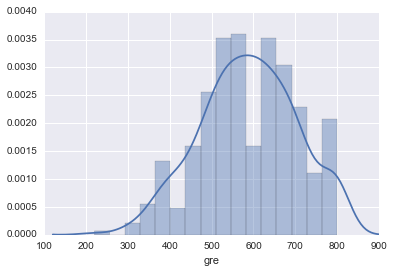

In [129]:
sns.distplot(df_raw['gre'].dropna())
print df_raw['gre'].skew()
print df_raw['gre'].kurtosis()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Both are different than the normal distribution, GRE is closer however as its skewness and kurtosis are closer to zero.  

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [132]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: GPA and GRE are the most colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Plot a regression for admission rates and the prestige of undergrad schools.  Look at how strong the relationships are between the variables, including coef, confidence intervals, r2.  

#### Question 14. What is your hypothesis? 

Answer: That the presitge of undergrad school is a significant factor in determining grad school admission rate. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data